In [28]:
import numpy as np

np.random.seed(100)


class Layer:
    """
    Represents a layer (hidden or output) in our neural network.
    """

    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        """
        :param int n_input: The input size (coming from the input layer or a previous hidden layer)
        :param int n_neurons: The number of neurons in this layer.
        :param str activation: The activation function to use (if any).
        :param weights: The layer's weights.
        :param bias: The layer's bias.
        """

        self.weights = weights if weights is not None else np.random.rand(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.rand(n_neurons)
        self.last_activation = None
        self.error = None
        self.delta = None

    def activate(self, x):
        """
        Calculates the dot product of this layer.
        :param x: The input.
        :return: The result.
        """

        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        """
        Applies the chosen activation function (if any).
        :param r: The normal value.
        :return: The "activated" value.
        """

        # In case no activation function was chosen
        if self.activation is None:
            return r

        # tanh
        if self.activation == 'tanh':
            return np.tanh(r)

        # sigmoid
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))

        return r

    def apply_activation_derivative(self, r):
        """
        Applies the derivative of the activation function (if any).
        :param r: The normal value.
        :return: The "derived" value.
        """

        # We use 'r' directly here because its already activated, the only values that
        # are used in this function are the last activations that were saved.

        if self.activation is None:
            return r

        if self.activation == 'tanh':
            return 1 - r ** 2

        if self.activation == 'sigmoid':
            return r * (1 - r)

        return r


class NeuralNetwork:
    """
    Represents a neural network.
    """

    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        """
        Adds a layer to the neural network.
        :param Layer layer: The layer to add.
        """

        self._layers.append(layer)

    def feed_forward(self, X):
        """
        Feed forward the input through the layers.
        :param X: The input values.
        :return: The result.
        """

        for layer in self._layers:
            X = layer.activate(X)

        return X

    def predict(self, X):
        """
        Predicts a class (or classes).
        :param X: The input values.
        :return: The predictions.
        """

        ff = self.feed_forward(X)

        # One row
        if ff.ndim == 1:
            return np.argmax(ff)

        # Multiple rows
        return np.argmax(ff, axis=1)

    def backpropagation(self, X, y, learning_rate):
        """
        Performs the backward propagation algorithm and updates the layers weights.
        :param X: The input values.
        :param y: The target values.
        :param float learning_rate: The learning rate (between 0 and 1).
        """

        # Feed forward for the output
        output = self.feed_forward(X)

        # Loop over the layers backward
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]

            # If this is the output layer
            if layer == self._layers[-1]:
                layer.error = y - output
                # The output = layer.last_activation in this case
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)

        # Update the weights
        for i in range(len(self._layers)):
            layer = self._layers[i]
            # The input is either the previous layers output or X itself (for the first hidden layer)
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        """
        Trains the neural network using backpropagation.
        :param X: The input values.
        :param y: The target values.
        :param float learning_rate: The learning rate (between 0 and 1).
        :param int max_epochs: The maximum number of epochs (cycles).
        :return: The list of calculated MSE errors.
        """

        mses = []

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            if i % 10 == 0:
                mse = np.mean(np.square(y - nn.feed_forward(X)))
                mses.append(mse)
                print('Epoch: #%s, MSE: %f' % (i, float(mse)))

        return mses

    @staticmethod
    def accuracy(y_pred, y_true):
        """
        Calculates the accuracy between the predicted labels and true labels.
        :param y_pred: The predicted labels.
        :param y_true: The true labels.
        :return: The calculated accuracy.
        """

        return (y_pred == y_true).mean()

Epoch: #0, MSE: 0.493821
Epoch: #10, MSE: 0.229725
Epoch: #20, MSE: 0.197990
Epoch: #30, MSE: 0.194248
Epoch: #40, MSE: 0.193029
Epoch: #50, MSE: 0.192013
Epoch: #60, MSE: 0.190730
Epoch: #70, MSE: 0.188895
Epoch: #80, MSE: 0.186293
Epoch: #90, MSE: 0.182946
Epoch: #100, MSE: 0.179057
Epoch: #110, MSE: 0.174675
Epoch: #120, MSE: 0.169565
Epoch: #130, MSE: 0.163116
Epoch: #140, MSE: 0.154368
Epoch: #150, MSE: 0.143564
Epoch: #160, MSE: 0.133169
Epoch: #170, MSE: 0.124437
Epoch: #180, MSE: 0.117074
Epoch: #190, MSE: 0.110702
Epoch: #200, MSE: 0.105110
Epoch: #210, MSE: 0.100168
Epoch: #220, MSE: 0.095770
Epoch: #230, MSE: 0.091825
Epoch: #240, MSE: 0.088261
Epoch: #250, MSE: 0.085016
Epoch: #260, MSE: 0.082037
Epoch: #270, MSE: 0.079277
Epoch: #280, MSE: 0.076697
Accuracy: 100.00%


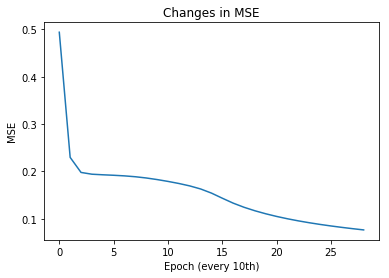

In [29]:
nn = NeuralNetwork()
nn.add_layer(Layer(2, 3, 'tanh'))
nn.add_layer(Layer(3, 3, 'sigmoid'))
nn.add_layer(Layer(3, 2, 'sigmoid'))

# Define dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Train the neural network
errors = nn.train(X, y, 0.3, 290)
print('Accuracy: %.2f%%' % (nn.accuracy(nn.predict(X), y.flatten()) * 100))

# Plot changes in mse
plt.plot(errors)
plt.title('Changes in MSE')
plt.xlabel('Epoch (every 10th)')
plt.ylabel('MSE')
plt.show()